In [ ]:
###This is our current plan 10/26/2020

##Data cleaning
#Drop the extra weather columns
#make categorical variables for some numerical columns (hour of the day, weekends v.s. weekdays)

##Questions
#Finding the relationships between different predictors
#Predicting the price
#Comparing Uber and Lyft in their models for price prediction, weights of different predictors
#Events, traffic conditions

##EDA
#A summary on the selected variables, and weather, some basic graphs and crosstabs
#Get into how the data was collected

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_path = 'rideshare_kaggle.csv'
rideshare_data = pd.read_csv(data_path,low_memory=False)

In [4]:
pd.set_option('display.max_columns', None)
rideshare_data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [5]:
rideshare_data.hour.describe()

count    693071.000000
mean         11.619137
std           6.948114
min           0.000000
25%           6.000000
50%          12.000000
75%          18.000000
max          23.000000
Name: hour, dtype: float64

In [6]:
rideshare_data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [7]:
# Check to see if any of the rows is duplicated 
rideshare_data[rideshare_data.duplicated()]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime


In [8]:
# Check to see which columns contain the missing values 
rideshare_data.columns[rideshare_data.isnull().any()]

Index(['price'], dtype='object')

In [9]:
sum(np.isnan(rideshare_data['price']))

55095

In [10]:
# extract the rows with the missing values; there are 55095 rows out of 693071 rows that contain the missing price values. 
rideshare_data[rideshare_data.isnull().any(axis = 1)]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
18,fa5fb705-03a0-4eb9-82d9-7fe80872f754,1.543674e+09,14,1,12,2018-12-01 14:13:04,America/New_York,North End,West End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.11,1.0,42.3647,-71.0542,36.99,32.27,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.68,5.87,6.26,1543672800,9.910,44.66,1543690800,35.04,1543712400,43.99,1543690800,35.69,1543712400,partly-cloudy-day,27.53,1022.32,344,0.44,1,9.910,280.1,1543665331,1543698851,0.82,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
31,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,1.543795e+09,23,2,12,2018-12-02 23:52:56,America/New_York,Beacon Hill,South Station,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.48,1.0,42.3588,-71.0707,48.83,48.83,Overcast,Light rain until evening.,0.0,0.0,0.96,2.83,2.98,1543755600,7.790,50.73,1543788000,44.99,1543816800,50.06,1543788000,45.64,1543816800,cloudy,47.81,1002.81,275,1.00,0,7.790,287.3,1543751797,1543785238,0.86,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
40,7f47ff53-7cf2-4a6a-8049-83c90e042593,1.543524e+09,20,29,11,2018-11-29 20:38:05,America/New_York,North Station,Fenway,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.94,1.0,42.3661,-71.0631,42.50,36.47,Partly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.54,10.68,17.15,1543514400,9.772,44.66,1543510800,28.68,1543575600,38.30,1543510800,27.26,1543568400,partly-cloudy-day,26.84,1008.44,314,0.35,0,9.772,307.4,1543492404,1543526094,0.75,0.0000,1543510800,35.15,1543550400,44.66,1543510800,30.98,1543550400,38.30,1543510800
60,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,1.544732e+09,20,13,12,2018-12-13 20:10:16,America/New_York,North End,West End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.16,1.0,42.3647,-71.0542,33.15,30.60,Mostly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.57,3.02,3.02,1544738400,9.956,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,partly-cloudy-day,19.51,1033.96,96,0.81,0,9.956,330.1,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
69,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,1.543583e+09,13,30,11,2018-11-30 13:08:03,America/New_York,North End,Beacon Hill,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.67,1.0,42.3647,-71.0542,31.80,31.80,Clear,Mostly cloudy throughout the day.,0.0,0.0,0.83,2.10,4.79,1543554000,10.000,42.52,1543600800,31.71,1543658400,40.53,1543611600,28.06,1543658400,clear-day,27.14,1017.01,296,0.01,0,10.000,277.1,1543578867,1543612470,0.79,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693025,70ad9983-92dd-4cdf-af16-732e7e9ee9d0,1.544887e+09,15,15,12,2018-12-15 15:15:13,America/New_York,South Station,Beacon Hill,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.50,1.0,42.3519,-71.0551,50.71,50.71,Mostly Cloudy,Mostly cloudy throughout the day.,0.0,0.0,0.83,3.55,4.79,1544918400,9.909,54.46,1544896800,39.29,1544954400,53.79,1544896800,35.17,154494

In [11]:
# Drop the rows that contain NA values 
rideshare_data = rideshare_data.dropna() 

(array([5.85000e+03, 5.63940e+04, 6.96840e+04, 1.09668e+05, 5.57700e+04,
        6.28440e+04, 8.02160e+04, 9.21960e+04, 5.49240e+04, 4.14000e+03,
        6.45600e+03, 2.67900e+04, 3.16200e+03, 3.55200e+03, 3.04800e+03,
        1.12800e+03, 6.00000e+00, 3.48000e+02, 1.77000e+03, 3.00000e+01]),
 array([0.02 , 0.412, 0.804, 1.196, 1.588, 1.98 , 2.372, 2.764, 3.156,
        3.548, 3.94 , 4.332, 4.724, 5.116, 5.508, 5.9  , 6.292, 6.684,
        7.076, 7.468, 7.86 ]),
 <a list of 20 Patch objects>)

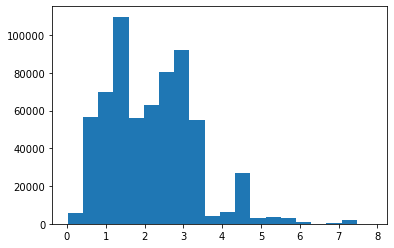

In [12]:
# something about the data
# only Nov and Dec
# even distribution in time of the day
# not everyday
# queried, not real passenger data
# no surge_multiplier for uber
plt.hist(rideshare_data.distance, bins = 20)

In [13]:
pd.crosstab(rideshare_data.surge_multiplier, rideshare_data.cab_type)

cab_type,Lyft,Uber
surge_multiplier,,
1.00,286433,330568
1.25,11085,0
1.50,5065,0
1.75,2420,0
2.00,2239,0
2.50,154,0
3.00,12,0


In [14]:
### Visualizations
import seaborn as sns

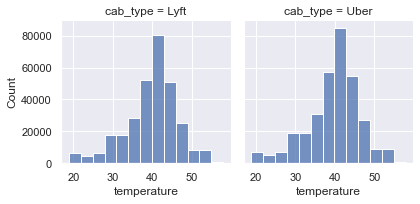

In [20]:
# Plot the temperature distribution by cab_type
sns.set_theme(style="darkgrid")
sns.displot(
    rideshare_data, x="temperature", col="cab_type",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

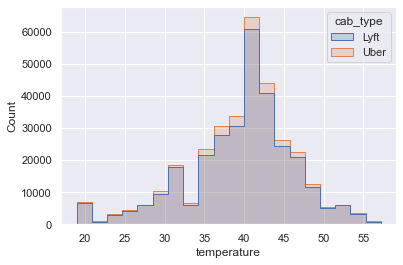

In [21]:
sns.histplot(rideshare_data, x="temperature", hue="cab_type", element="step", bins = 20)

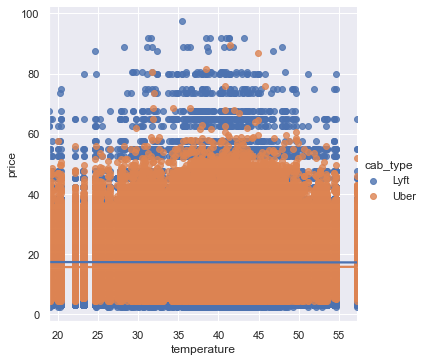

In [26]:
sns.lmplot(
    data=rideshare_data,
    x="temperature", y="price", hue="cab_type",
    height=5
)

In [32]:
rideshare_data['price'][rideshare_data['cab_type'] == "Uber"].describe()

count    330568.000000
mean         15.795343
std           8.560300
min           4.500000
25%           9.000000
50%          12.500000
75%          21.500000
max          89.500000
Name: price, dtype: float64

In [33]:
rideshare_data['price'][rideshare_data['cab_type'] == "Lyft"].describe()

count    307408.000000
mean         17.351396
std          10.019171
min           2.500000
25%           9.000000
50%          16.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

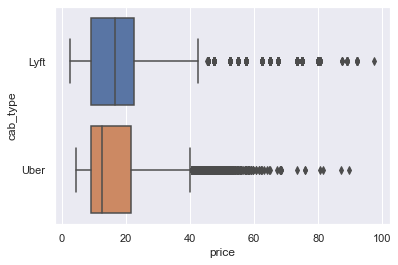

In [35]:
sns.boxplot(x='price', y='cab_type', data=rideshare_data, orient="h")

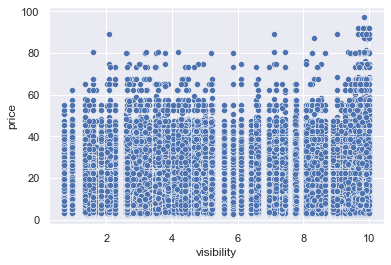

In [30]:
sns.scatterplot(x="visibility", y="price", data=rideshare_data)